
## CLASIFICACIÓN DEL RIESGO DE ABANDONO DE LOS CLIENTES DE UN BANCO

El conjunto de datos con el que vamos a trabajar ahora contiene información sobre los usuarios de un banco. Queremos predecir si los clientes van a dejar de usar los servicios de dicho banco o no. El conjunto de datos consta de 10000 observaciones y 14 variables.

La siguiente figura indica cómo cargar el conjunto de Datos:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Creamos una matriz con las variables de entrada y otra matriz con la variable de salida (objetivo, columna 14). Excluiremos la columna 1 y 2 que son ‘row_number’ y ‘customerid’ ya que no nos aportan información útil para el análisis.

In [6]:
X = dataset.iloc[:, 3:13].values

In [7]:
X[0:4]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63]],
      dtype=object)

In [8]:
y = dataset.iloc[:, 13].values

Vamos a hacer el análisis más sencillo si codificamos las variables no numéricas. Country contiene los valores: ’France, Spain, Germany’ y Gender: ‘Male, Female’. La manera de codificarlo será convertir estas palabras a valores numéricos. Para esto usaremos la función LabelEncoder, de la librería ‘ScikitLearn’, que al darle una cadena de texto nos devuelve valores entre 0 y n_clases-1.

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [10]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

Observamos que Country ahora toma valores del 0 al 2 mientras que male y female fueron reemplazados por 0 y 1.

Usaremos la función train_test_split de la librería ScikitLearn para dividir nuestros datos.

Usaremos 80% para entrenar el modelo y 20% para validarlo.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train, X_test, y_train, y_test

(array([[556, 0, 1, ..., 1, 0, 193214.05],
        [520, 0, 0, ..., 1, 0, 56388.63],
        [605, 0, 0, ..., 0, 0, 35982.42],
        ...,
        [590, 0, 1, ..., 1, 1, 8214.46],
        [526, 2, 1, ..., 1, 0, 36251.0],
        [792, 2, 1, ..., 0, 1, 67468.67]], dtype=object),
 array([[803, 0, 0, ..., 1, 1, 54277.45],
        [698, 0, 0, ..., 1, 1, 40339.9],
        [791, 2, 1, ..., 1, 0, 89666.28],
        ...,
        [548, 2, 1, ..., 1, 0, 16989.77],
        [498, 1, 1, ..., 1, 1, 53445.17],
        [632, 0, 1, ..., 1, 1, 152665.85]], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 1, 0]))

Si observamos los datos detenidamente podemos apreciar que hay variables cuyos valores pueden
ser muy variados, desde muy altos a muy pequeños por esta razón escalaremos los datos.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)

In [17]:
X_test = sc.transform(X_test)

In [18]:
X_train, X_test, y_train, y_test

(array([[-0.97156223, -0.89607774,  0.91578261, ...,  0.63987754,
         -1.02866055,  1.62806945],
        [-1.343839  , -0.89607774, -1.09196221, ...,  0.63987754,
         -1.02866055, -0.75642766],
        [-0.46485218, -0.89607774, -1.09196221, ..., -1.56279902,
         -1.02866055, -1.11205272],
        ...,
        [-0.6199675 , -0.89607774,  0.91578261, ...,  0.63987754,
          0.97213799, -1.59597318],
        [-1.28179287,  1.52657246,  0.91578261, ...,  0.63987754,
         -1.02866055, -1.1073721 ],
        [ 1.46891882,  1.52657246,  0.91578261, ..., -1.56279902,
          0.97213799, -0.56333252]]),
 array([[ 1.58267006, -0.89607774, -1.09196221, ...,  0.63987754,
          0.97213799, -0.79321982],
        [ 0.49686281, -0.89607774, -1.09196221, ...,  0.63987754,
          0.97213799, -1.03611363],
        [ 1.4585778 ,  1.52657246,  0.91578261, ...,  0.63987754,
         -1.02866055, -0.1764882 ],
        ...,
        [-1.0542904 ,  1.52657246,  0.91578261, ...,  

Una vez escalados los datos, pasamos a construir la red neuronal. Importamos Keras, usamos el módulo Sequential para inicializar la red y el modelo Dense para añadir capas ocultas.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense

Inicializamos la red con Sequential().

In [20]:
classifier = Sequential()

Añadimos las capas usando la función Dense. Indicamos el número de nodos que queremos añadir con output_dim, Init es la inicialización del descenso de gradiente estocástico. Los pesos iniciales serán una variable aleatoria uniforme. Input_dim sólo es necesaria en la primera capa para que el modelo sepa la cantidad de variables que va a recibir, en nuestro caso 11. A partir de aquí las siguientes capas heredarán esta cualidad de la primera capa. La función de activación que utilizaremos será relu en las dos primeras capas (cuanto más cerca tenga su valor a 1, la neurona estará más activada y tendrá más interacción) y en la capa final hemos utilizado la función sigmoide ya que nuestro objetivo es clasificar.

Una vez que tenemos la configuración específica de la red, la siguiente tarea es compilarla, para eso utilizamos la función Compile. El primer argumento de esta función es Optimizer que indica el método para entrenar los pesos. Adam es un algoritmo que se basa en el cálculo del descenso del Gradiente Estocástico. El segundo parámetro es loss, este usará la función ‘binary_crossentropy’ para clasificar en 2 categorías. Si tuviéramos más categorías utilizaríamos la función ‘categorical_crossentropy’. Para saber la bondad de nuestra red neuronal utilizaremos la métrica accuracy.

In [21]:
classifier.add(Dense(6, activation="relu", input_shape=(10,)))

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
classifier.add(Dense(6, activation="relu"))

In [23]:
classifier.add(Dense(1, activation="sigmoid"))

In [24]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Usaremos la función fit para ajustar los pesos de la red. Batch_size para especificar el número de observaciones que necesita entrenar antes de actualizar los pesos. Epoch nos indica el número de iteraciones que realizaremos en el entrenamiento. La estimación de estos parámetros se tiene que hacer por ensayo-error, probando con diferentes valores.

In [25]:
classifier.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100


I0000 00:00:1738665822.158827  184292 service.cc:148] XLA service 0x72d998004bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738665822.158845  184292 service.cc:156]   StreamExecutor device (0): NVIDIA T600 Laptop GPU, Compute Capability 7.5
2025-02-04 11:43:42.172991: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738665822.255254  184292 cuda_dnn.cc:529] Loaded cuDNN version 90600


 182/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 834us/step - accuracy: 0.4272 - loss: 0.8060     

I0000 00:00:1738665822.433203  184292 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 825us/step - accuracy: 0.7557 - loss: 0.5177
Epoch 2/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 786us/step - accuracy: 0.8091 - loss: 0.4270
Epoch 3/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 795us/step - accuracy: 0.8526 - loss: 0.3642
Epoch 4/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 768us/step - accuracy: 0.8585 - loss: 0.3577
Epoch 5/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 740us/step - accuracy: 0.8630 - loss: 0.3439
Epoch 6/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 722us/step - accuracy: 0.8557 - loss: 0.3552
Epoch 7/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 720us/step - accuracy: 0.8580 - loss: 0.3556
Epoch 8/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 723us/step - accuracy: 0.8611 - loss: 0.3451
Epoch 9/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 720us/step - accuracy: 0.8598 - loss: 0.3397
Epoch 10/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 723us/step - accuracy: 0.8638 - loss: 0.3449
Epoch 11/100
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 725us/step - accuracy: 0.8660 - loss: 0.3412
Epoch 12/

Para realizar la predicción sobre nuestro conjunto de test lo haremos mediante la siguiente expresión:

In [26]:
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


In [27]:
y_pred = y_pred > 0.5

La predicción nos proporcionará la probabilidad de pertenecer a un grupo u otro, de tal manera que aquellos valores mayores que 0.5 serán 1 y el resto 0.

Creamos una matriz de confusión y vemos los resultados:

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1518,   55],
       [ 247,  180]])

In [30]:
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1573
           1       0.77      0.42      0.54       427

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.83      2000



# EJERCICIO
- En base a todo lo aprendido, al igual que en el ejemplo asociado a los vinos, realizar una tabla que 
recoja los parámetros, métricas y resultados obtenidos de las diferentes ejecuciones que hayas 
realizado según tu “intuición” y resultados que hayas ido sacando con las diferentes ejecuciones. 
Sacar conclusiones basándote en la tabla obtenida.

# Comparación de Modelos

Entrenaremos y compararemos distintos modelos con diversas configuraciones para determinar cuál funciona mejor.

## Arquitecturas de Red
- **Red simple**: Una capa oculta con 16 neuronas.
- **Red profunda**: 64-32-16 neuronas.

## Funciones de Activación
- **relu**: Rápida y común.
- **tanh**: Salidas entre -1 y 1, útil en algunos casos.
- **elu**: Similar a relu, con posibles mejoras de rendimiento.

## Regularización
- **Dropout**: Desactivamos el 20% de las neuronas en entrenamiento.
- **L2 Regularization**: Penalización en los pesos para evitar sobreajuste.

## Batch Normalization
- Normalización de salidas para entrenamientos más rápidos y estables.

## Optimizadores
- **Adam**: Ajusta automáticamente la tasa de aprendizaje.
- **SGD**: Más simple, con momentum para mejorar rendimiento.
- **RMSprop**: Adapta la tasa de aprendizaje dinámicamente.

## Hiperparámetros
- **Tasa de aprendizaje**: 0.001 y 0.0001.
- **Tamaño del batch**: 32 y 64.
- **Número de épocas**: 50 y 100.

Training model 1/14: {'layers': [16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da63fca6e0>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


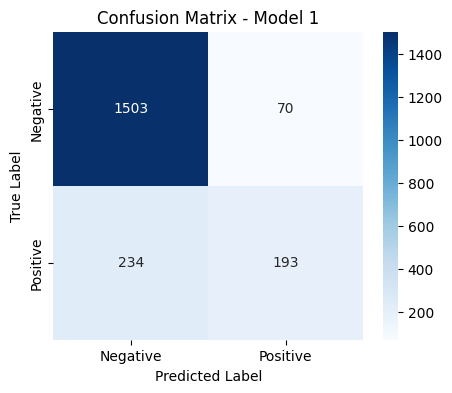

Training model 2/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da597a8be0>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


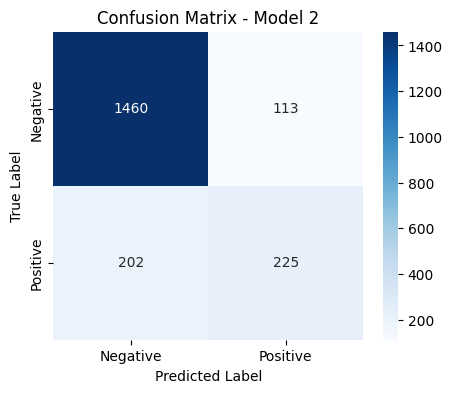

Training model 3/14: {'layers': [64, 32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da5112a4a0>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


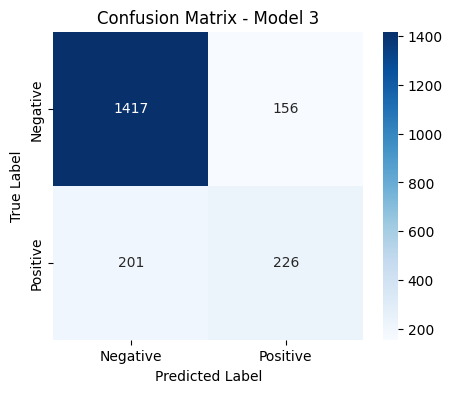

Training model 4/14: {'layers': [128, 64, 32], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da5112aa10>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


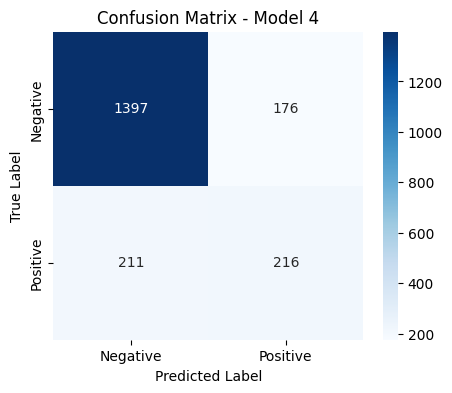

Training model 5/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da5112a140>, 'activation': 'tanh'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


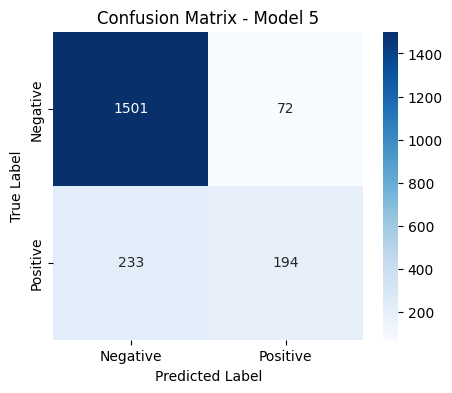

Training model 6/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da51129bd0>, 'activation': 'elu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


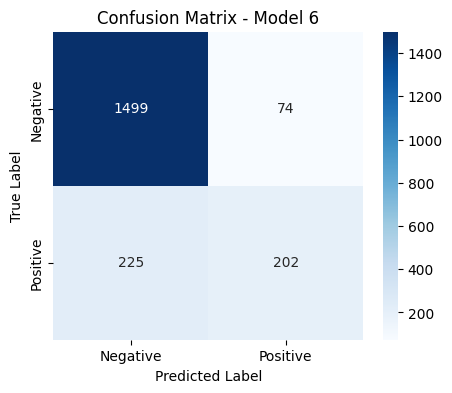

Training model 7/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da51129660>, 'activation': 'relu', 'dropout_rate': 0.2}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


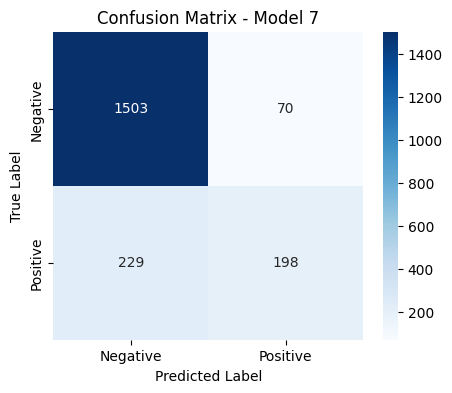

Training model 8/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da511290f0>, 'activation': 'relu', 'l2_reg': 0.001}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


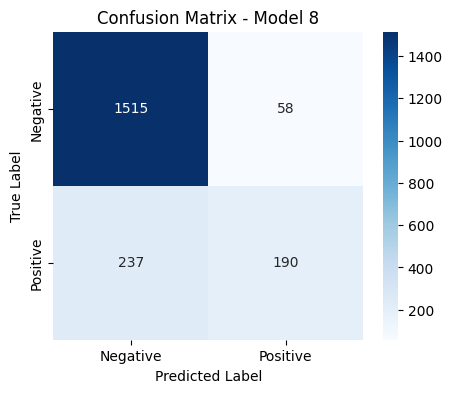

Training model 9/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da51128b80>, 'activation': 'relu', 'batch_norm': True}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


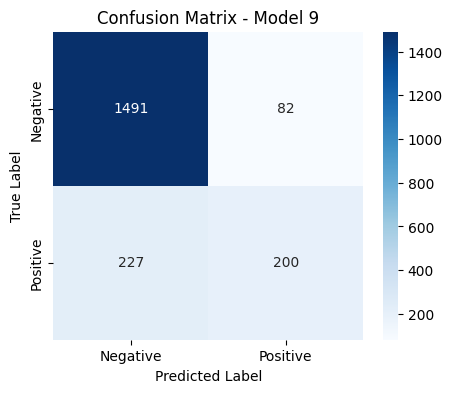

Training model 10/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.sgd.SGD object at 0x72da58134f70>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


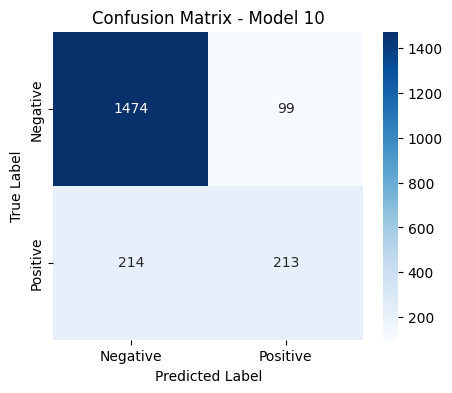

Training model 11/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da58135330>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


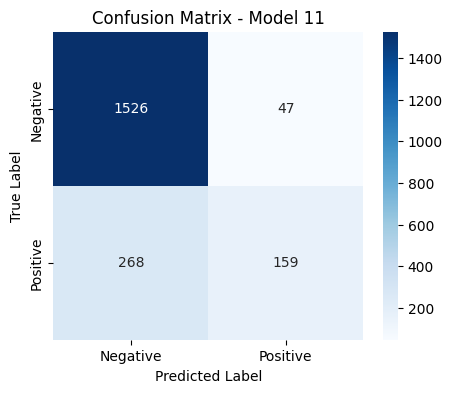

Training model 12/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 32, 'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x72da6fde82e0>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


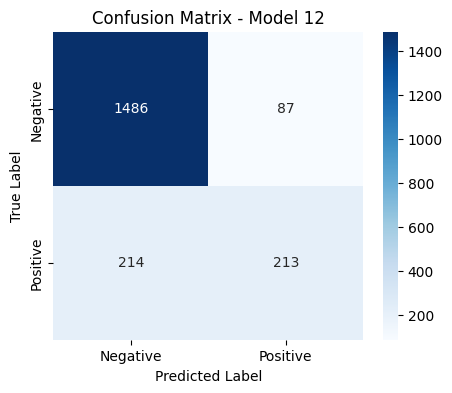

Training model 13/14: {'layers': [32, 16], 'epochs': 100, 'batch_size': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da6fdea8f0>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


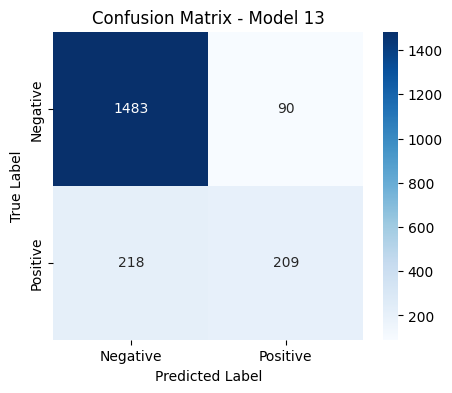

Training model 14/14: {'layers': [32, 16], 'epochs': 50, 'batch_size': 64, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x72da6fde8e50>, 'activation': 'relu'}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


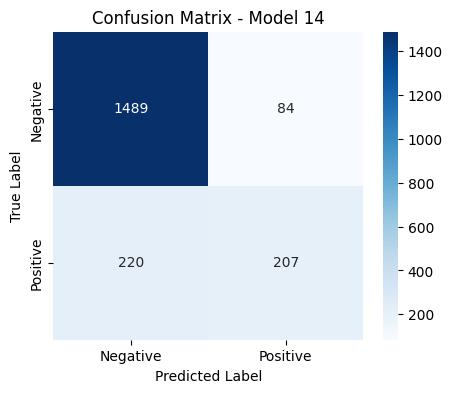

In [46]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import pandas as pd
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

configurations = [
    # Baseline configurations with ReLU
    {
        "layers": [16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
    # Deeper networks
    {
        "layers": [64, 32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
    {
        "layers": [128, 64, 32],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
    # Different activations
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "tanh",
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "elu",
    },
    # Regularization and batch normalization
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
        "dropout_rate": 0.2,
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
        "l2_reg": 0.001,
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
        "batch_norm": True,
    },
    # Optimizer variations
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": SGD(learning_rate=0.01, momentum=0.9),
        "activation": "relu",
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.0001),
        "activation": "relu",
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 32,
        "optimizer": RMSprop(learning_rate=0.001, rho=0.9),
        "activation": "relu",
    },
    # Training parameters
    {
        "layers": [32, 16],
        "epochs": 100,
        "batch_size": 32,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
    {
        "layers": [32, 16],
        "epochs": 50,
        "batch_size": 64,
        "optimizer": Adam(learning_rate=0.001),
        "activation": "relu",
    },
]

results = []

for idx, config in enumerate(configurations):
    print(f"Training model {idx + 1}/{len(configurations)}: {config}")

    model = Sequential()

    # Input layer with optional L2 regularization
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(
        Dense(
            config["layers"][0],
            activation=config["activation"],
            kernel_regularizer=l2(config.get("l2_reg", 0.0)),
            kernel_initializer=config.get("kernel_initializer", "glorot_uniform"),
        )
    )

    if config.get("batch_norm", False):
        model.add(BatchNormalization())

    # Hidden layers
    for neurons in config["layers"][1:]:
        model.add(
            Dense(
                neurons,
                activation=config["activation"],
                kernel_regularizer=l2(config.get("l2_reg", 0.0)),
                kernel_initializer=config.get("kernel_initializer", "glorot_uniform"),
            )
        )
        if config.get("batch_norm", False):
            model.add(BatchNormalization())
        if "dropout_rate" in config:
            model.add(Dropout(config["dropout_rate"]))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))

    # Compile
    model.compile(
        optimizer=config["optimizer"], loss="binary_crossentropy", metrics=["accuracy"]
    )

    # Train with validation split and track time
    start_time = time.time()
    history = model.fit(
        X_train,
        y_train,
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        validation_split=0.2,
        verbose=0,
    )
    training_time = time.time() - start_time

    # Evaluate on test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Metrics
    test_acc = accuracy_score(y_test, y_pred_binary)
    val_acc = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)

    # Save results
    results.append(
        {
            "Layers": config["layers"],
            "Epochs": config["epochs"],
            "Batch Size": config["batch_size"],
            "Optimizer": config["optimizer"].__class__.__name__,
            "Learning Rate": config["optimizer"].get_config()["learning_rate"],
            "Activation": config["activation"],
            "Dropout": config.get("dropout_rate", None),
            "L2 Reg": config.get("l2_reg", None),
            "Batch Norm": config.get("batch_norm", False),
            "Test Accuracy": round(test_acc, 4),
            "Validation Accuracy": round(val_acc, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1": round(f1, 4),
            "Training Time (s)": round(training_time, 1),
        }
    )
    plot_confusion_matrix(y_test, y_pred_binary, title=f"Confusion Matrix - Model {idx + 1}")

In [48]:
import pandas as pd

# Display results
df_results = pd.DataFrame(results)
pd.set_option("display.max_columns", None)
print("\nSummary of Results:")
print(df_results.sort_values(by="F1", ascending=False))


Summary of Results:
           Layers  Epochs  Batch Size Optimizer  Learning Rate Activation  \
1        [32, 16]      50          32      Adam         0.0010       relu   
11       [32, 16]      50          32   RMSprop         0.0010       relu   
13       [32, 16]      50          64      Adam         0.0010       relu   
9        [32, 16]      50          32       SGD         0.0100       relu   
12       [32, 16]     100          32      Adam         0.0010       relu   
5        [32, 16]      50          32      Adam         0.0010        elu   
6        [32, 16]      50          32      Adam         0.0010       relu   
8        [32, 16]      50          32      Adam         0.0010       relu   
7        [32, 16]      50          32      Adam         0.0010       relu   
4        [32, 16]      50          32      Adam         0.0010       tanh   
0            [16]      50          32      Adam         0.0010       relu   
2    [64, 32, 16]      50          32      Adam        

- El modelo con el mejor F1-score es el modelo 1, con un valor de 0.5882. Este modelo utiliza una arquitectura de red de [32, 16], optimizador Adam, una tasa de aprendizaje de 0.001, función de activación ReLU, y no emplea técnicas de regularización como dropout o L2. Aunque su precisión en prueba (0.8425) y validación (0.8531) no son las más altas, logra un equilibrio entre precisión y recall, lo que resulta en un F1-score superior. 
- Dadas las cracterísticas del problema, donde la segunda clase parece tener problemas para ser diferenciada, elegir al modelo con mayor F1 puede ser interesante. En este caso, el modelo más simple es el que mejor ha ido en este aspecto.
- Los modelos con más capas no han sido necesariamente mejores, de hecho el modelo 3 no parece mejorar prácticamente nada con respecto a otros tipos. La profundidad de capas y número de neuronas no parece afectar a las métricas.
- Los modelos que usan técnicas regularizadoras obtienen una precisión muy buena, pero el modelo 10 que no tiene ninguna de estas técnicas los supera a ambos modelos con técnicas de regularización.
- En cuanto a accuracy puro en la partición de test, el mejor modelo es el número 5 y 6. El 6 aplica regularización de dropout, el 5 solo cambia la función de activación. Los resultados no son tampoco muy distintos a los del resto de modelos.
- Los modelos con más épocas tardan más (obviamente) y los que tienen un mayor tamaño de batch son más rápidos (obviamente).
- En cuanto a optimizadores, usando SGD y RMSprop se alcanzan muy buenas métricas con f1-score, pero el modelo de ADAM parece ir mejor.
